### 텍스트 마이닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/bourne_scenario.csv")

In [3]:
df.head()

,page_no,scene_title,text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...


### EDA 진행

In [4]:
# 데이터 개수
df.shape

(320, 3)

In [5]:
# 널값 확인
df.isnull().sum()

page_no        0
scene_title    0
text           0
dtype: int64

In [6]:
# 데이터 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_no      320 non-null    int64 
 1   scene_title  320 non-null    object
 2   text         320 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [8]:
# 실제 사용하고자 하는 데이터 형태 확인
df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

### 정규식을 써 텍스트 전처리

In [24]:
# 정규식을 써 숫자, 공백, 특수문자, 대문자, 를 제거해 통일을 해야 한다. 
import re

def apply_regular_expression(text):
    text = text.lower()
    english = re.compile('[^ a-z]') # '^' = 모두 들고 옴, 즉 '^ _____' 으로 띄어쓰기+a-z만 들고옴(나머지 특수문자 없어짐)
    result = english.sub('', text) #.sub() - 정규표현식을 들어오는 text파라미터에 적용함
    result = re.sub(' +', ' ', result) # ' +' = 띄어쓰기가 2개이상이면 ' ' 하나로 바꿔 줘
    return result
    

In [25]:
apply_regular_expression(df['text'][0])

' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed '

In [38]:
# 컬럼을 새로 만들어 적용된 전처리 텍스트를 붙여주자
# df['preprocessed_text'] = df['text'].apply(apply_regular_expression)
df['preprocessed_text'] = df['text'].apply(lambda x: apply_regular_expression(x))

In [39]:
df.head()

,page_no,scene_title,text,preprocessed_text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...


### BoW 적용

In [41]:
# 말뭉치 만들기
corpus = df['preprocessed_text'].tolist()
corpus

[' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed ',
 ' a on his knee a syringe and a gun the eyes of the driver jarda watching bournes pov the passenger back of his head cell phone rings the head turns its conklin bourne returns his stare ',
 ' bournes eyes open panicked gasping trying to stay quiet marie sleeps ',
 ' a bourne moving for the medicine cabinet digs through the medicine cabinet downs something specific ',
 ' one minute later bourne moves out onto the veranda marie pads in watching him for a moment concerned clearly its not the first time this has happened they both look different than last we saw them his hair is longer shes a blonde hippie travelers their cottage is humble but sweet the bedroom opens to a beach and a town just down the hill club music from some all night rave wafting in from the far distance marie where were you jason bourne in the car conklin up fro

In [60]:
print(len(corpus))

320


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# 벡터화 작업
# tokenizer - 커스텀 함수로 토큰화 가능, stop_words - 불용어로 처리하고자 하는 언어 선택
# analyzer - 토근화 하고자 하는 단위
vect = CountVectorizer(tokenizer=None, stop_words='english', analyzer='word').fit(corpus)

# 데이터 학습 (.fit_transform() 은 들어온 데이터에 정규화를 하여 범위를 맞추고 모델 생성 )
bow_vect = vect.fit_transform(corpus)

# 단어 종류와 단어 세기
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0) #열을 기준으로 더하기 함, 즉 0번열에 1이 몇번 찍혔는지

In [61]:
word_list[:5]

['aa', 'ab', 'abandoned', 'abandons', 'abbott']

In [62]:
count_list[:5]

array([  3,   3,   2,   1, 128], dtype=int64)

In [52]:
print(bow_vect)

  (0, 1898)	1
  (0, 1366)	1
  (0, 2387)	1
  (0, 2763)	1
  (0, 1001)	1
  (0, 1978)	1
  (0, 1673)	1
  (0, 2412)	1
  (0, 2788)	1
  (0, 798)	1
  (0, 1251)	1
  (0, 237)	1
  (0, 1984)	1
  (0, 125)	1
  (0, 974)	1
  (0, 874)	1
  (1, 237)	1
  (1, 1297)	1
  (1, 2459)	1
  (1, 1055)	1
  (1, 795)	1
  (1, 703)	1
  (1, 1248)	1
  (1, 2741)	1
  (1, 240)	1
  :	:
  (317, 1600)	3
  (317, 837)	1
  (317, 921)	1
  (317, 913)	1
  (317, 1887)	1
  (317, 2102)	3
  (317, 106)	1
  (317, 1847)	1
  (317, 381)	1
  (317, 1621)	2
  (317, 2595)	1
  (317, 2349)	1
  (318, 2788)	1
  (318, 237)	1
  (318, 1649)	1
  (318, 1566)	1
  (318, 1012)	1
  (318, 162)	1
  (318, 1864)	1
  (318, 2339)	1
  (319, 751)	1
  (319, 46)	1
  (319, 1010)	1
  (319, 803)	1
  (319, 646)	1


In [63]:
bow_vect.shape (#320개 문장, 2850개의 단어)

(320, 2850)

In [64]:
# 단어수와 카운트를 딕셔너리로 변환
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'aa': 3, 'ab': 3, 'abandoned': 2, 'abandons': 1, 'abbott': 128, 'abbottnow': 1, 'abbottphone': 4, '


In [65]:
import operator

# operator의 sorted() 를 써서 정렬
# word_count_dict의 아이템들을 정렬 데이터로 씀
# key - key값을 기준으로 정렬, 즉 .items()의 1번 인덱싱 기준으로 정렬
# reverse - false(오름차순), True(내림차순)
sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:5]

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93)]

In [66]:
word_count_dict.items()

dict_items([('aa', 3), ('ab', 3), ('abandoned', 2), ('abandons', 1), ('abbott', 128), ('abbottnow', 1), ('abbottphone', 4), ('abbotts', 3), ('abend', 2), ('able', 1), ('aboott', 1), ('aboutfaces', 1), ('absolutely', 1), ('abyss', 1), ('accelerating', 1), ('accented', 1), ('accepting', 1), ('accepts', 1), ('access', 3), ('accompanying', 1), ('accomplished', 1), ('account', 3), ('acknowledged', 1), ('act', 1), ('activity', 2), ('actually', 3), ('address', 3), ('adjust', 1), ('adrenaline', 1), ('affirmative', 1), ('afford', 1), ('afraid', 1), ('afternoon', 1), ('againi', 1), ('agencies', 1), ('agency', 5), ('agent', 2), ('agents', 2), ('agitated', 1), ('ago', 10), ('agreement', 2), ('agrees', 1), ('ah', 1), ('ahead', 17), ('aim', 1), ('aimed', 1), ('air', 9), ('airport', 2), ('alarm', 3), ('alert', 1), ('alexanderplatz', 3), ('alive', 9), ('alley', 2), ('alleys', 1), ('allocation', 1), ('allpoints', 1), ('alongside', 1), ('alps', 1), ('alright', 2), ('alrighti', 1), ('alrighttake', 1), ('

(array([2.416e+03, 1.720e+02, 9.200e+01, 5.000e+01, 2.900e+01, 1.700e+01,
        2.000e+01, 1.000e+01, 7.000e+00, 6.000e+00, 6.000e+00, 2.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

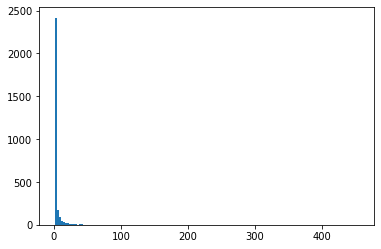

In [70]:
# 단어 분포 시각화
plt.hist(list(word_count_dict.values()), bins=150)

### 전처리된 텍스트들을 분석

In [71]:
# 단어별 빈도 분석. 워드 클라우드 시각화
from collections import Counter

import random
import pytagcloud
import webbrowser

ranked_tags = Counter(word_count_dict).most_common(25)

pygame 2.0.3 (SDL 2.0.16, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [72]:
ranked_tags

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35)]

In [74]:
# taglist = pytagcloud.make_tags(ranked_tags = Counter(word_count_dict).most_common(40), maxsize=60)

taglist = pytagcloud.make_tags(sorted(word_count_dict.items(), 
                                      key=operator.itemgetter(1), reverse=True)[:40], maxsize=60)
pytagcloud.create_tag_image(taglist, 'Word-Cloud_Example.jpg', rectangular=False)


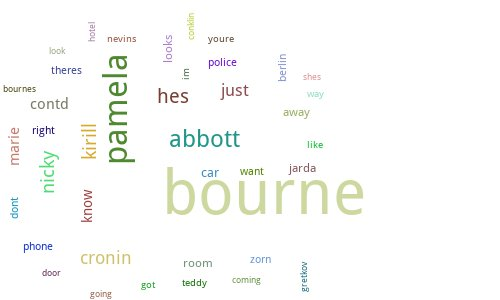

In [75]:
from IPython.display import Image
Image(filename = 'Word-Cloud_Example.jpg')

### 장면별 중요 단어 시각화

In [76]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect) #BoW된 데이터들을 넣기만 하면 됨


In [83]:
bow_vect.shape

(320, 2850)

In [77]:
tf_idf_vect.shape

(320, 2850)

In [99]:
print(tf_idf_vect[1])

  (0, 2741)	0.18188994154508037
  (0, 2626)	0.184271115071485
  (0, 2459)	0.26281872840132553
  (0, 2332)	0.2768588724878374
  (0, 1990)	0.2355070289661195
  (0, 1971)	0.2768588724878374
  (0, 1817)	0.18188994154508037
  (0, 1747)	0.1644826434042214
  (0, 1710)	0.22899011264755004
  (0, 1297)	0.2768588724878374
  (0, 1248)	0.22899011264755004
  (0, 1097)	0.4184032819605729
  (0, 1055)	0.19831125915799686
  (0, 795)	0.17537302522651094
  (0, 703)	0.20529520656387226
  (0, 481)	0.19831125915799686
  (0, 351)	0.22899011264755004
  (0, 240)	0.16613718748556197
  (0, 237)	0.08248118971626973


In [98]:
print(tf_idf_vect[1].toarray().shape)
print(tf_idf_vect[1].toarray())

(1, 2850)
[[0. 0. 0. ... 0. 0. 0.]]


In [101]:
# 벡터 단어 매핑
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

In [105]:
invert_index_vectorizer

{1898: 'raining',
 1366: 'light',
 2387: 'strobes',
 2763: 'wet',
 1001: 'glass',
 1978: 'rhythmic',
 1673: 'pace',
 2412: 'suddenly',
 2788: 'window',
 798: 'face',
 1251: 'jason',
 237: 'bourne',
 1984: 'riding',
 125: 'backseat',
 974: 'gaze',
 874: 'fixed',
 1297: 'knee',
 2459: 'syringe',
 1055: 'gun',
 795: 'eyes',
 703: 'driver',
 1248: 'jarda',
 2741: 'watching',
 240: 'bournes',
 1817: 'pov',
 1710: 'passenger',
 1097: 'head',
 351: 'cell',
 1747: 'phone',
 1990: 'rings',
 2626: 'turns',
 481: 'conklin',
 1971: 'returns',
 2332: 'stare',
 1649: 'open',
 1693: 'panicked',
 968: 'gasping',
 2615: 'trying',
 2347: 'stay',
 1886: 'quiet',
 1454: 'marie',
 2221: 'sleeps',
 1556: 'moving',
 1482: 'medicine',
 299: 'cabinet',
 640: 'digs',
 690: 'downs',
 2283: 'specific',
 1515: 'minute',
 1333: 'later',
 1555: 'moves',
 2679: 'veranda',
 1681: 'pads',
 1537: 'moment',
 468: 'concerned',
 408: 'clearly',
 2542: 'time',
 1082: 'happened',
 1405: 'look',
 638: 'different',
 2044: 'saw

In [102]:
# 중요 단어 추출
np.argsort(tf_idf_vect[0].toarray())[0][-3:] # 첫 문장에서 탑 3개

array([1984, 2387, 1978], dtype=int64)

In [104]:
np.argsort(tf_idf_vect.toarray())[:,-3:]

array([[1984, 2387, 1978],
       [1297, 1971, 1097],
       [1693, 2221,  968],
       [ 690,  299, 1482],
       [2823, 1951, 1454],
       [2218, 2815, 1454],
       [2038,  737, 2418],
       [ 852, 2761, 2570],
       [2022,  156, 1352],
       [2250, 2241, 1454],
       [ 342,  321, 2188],
       [ 614, 1557, 1534],
       [ 535, 1884, 1614],
       [2188,  139,   20],
       [ 503,  730, 1458],
       [2790, 2384,  724],
       [ 169,  915, 2444],
       [1905, 1259,   53],
       [2566, 1335,  828],
       [2300,  281, 1702],
       [2503, 1502, 2567],
       [ 794, 1454, 1018],
       [ 698, 2559, 1252],
       [1871,  237, 1454],
       [ 204,  911, 2591],
       [ 237,  596, 1454],
       [  52,  941, 1036],
       [ 211, 1156,  206],
       [1193, 2712, 1454],
       [  52, 1809, 2462],
       [ 237, 1454,  702],
       [2130,  237, 1454],
       [1995, 1890,  321],
       [1011,  259, 1454],
       [1985, 2216, 1819],
       [ 420, 2276, 1454],
       [2019, 1103, 2059],
 

In [108]:
# DF에 다시 단어로 붙여서 반환
top_3_word = np.argsort(tf_idf_vect.toarray())[:,-3:]
df['important_word_indexes'] = pd.Series(top_3_word.tolist())

In [109]:
df.head()

,page_no,scene_title,text,preprocessed_text,important_word_indexes
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]"


In [114]:
# 탑3 벡터를 워드로 변환
def convert_to_word(x):
    word_list = []
    for word in x:
        word_list.append(invert_index_vectorizer[word]) #인덱스에 해당하는 키값을 찾아줌
    return word_list

df['important_words'] = df['important_word_indexes'].apply(lambda x:convert_to_word(x))

In [115]:
df.head()

,page_no,scene_title,text,preprocessed_text,important_word_indexes,important_words
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]","[riding, strobes, rhythmic]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]","[knee, returns, head]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]","[panicked, sleeps, gasping]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]","[downs, cabinet, medicine]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]","[write, remember, marie]"


In [10]:
a = df['text'][0]

In [13]:
a

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

In [22]:
text = a.lower()
text

" 1                it's raining...                light strobes across the wet glass at a rhythmic pace...                 suddenly -- through the window a face -- jason bourne --               riding in the backseat -- his gaze fixed.      "

In [20]:
result = english.sub('', text)
result

'                 its raining                light strobes across the wet glass at a rhythmic pace                 suddenly  through the window a face  jason bourne                riding in the backseat  his gaze fixed      '

In [23]:
result = english.sub('!', text)
result

' !                it!s raining!!!                light strobes across the wet glass at a rhythmic pace!!!                 suddenly !! through the window a face !! jason bourne !!               riding in the backseat !! his gaze fixed!      '